#### Name : Prathamesh Rokade
### Branch : AIML - C
### Roll No : 57
### Date : 13-08-24
### Machine Learning Practical 3

### Aim:
### The customer dataset encompasses their purchasing patterns across diverse attributes, intended to aid data scientists and analysts in comprehending the determinants impacting buying choices. It includes demographic details, buying behaviors, and pertinent features. Develop a machine learning model that predicts whether an individual will purchase product or not.
### - Perform the EDA
### - Apply logistic regression
### - Apply Decision tree algorithm
### - Apply KNN
### - Evaluate the performance using Precision, Recall, F1 score and accuracy.
### - Apply hyper parameter tuning to improve performance.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

# Load the data
df = pd.read_csv('customer_purchase_data.csv')

### Perform EDA

In [14]:
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.26794,8,0,30.568601,0,5,1
1,20,1,23579.77358,4,2,38.240097,0,5,0
2,27,1,127821.30640,11,2,31.633212,1,0,1
3,24,1,137798.62310,19,3,46.167059,0,4,1
4,31,1,99300.96422,19,1,19.823592,0,0,1


In [16]:
df.tail()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
1495,39,1,65048.14183,13,0,34.590743,0,5,1
1496,67,1,28775.33107,18,2,17.625707,0,1,1
1497,40,1,57363.24754,7,4,12.206033,0,0,0
1498,63,0,134021.77550,16,2,37.311634,1,0,1
1499,50,0,52625.66597,13,0,25.348017,1,4,1


In [18]:
df.describe()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,0.504667,84249.164339,10.420000,2.012667,30.469040,0.326667,2.555333,0.43200
std,15.537259,0.500145,37629.493078,5.887391,1.428005,16.984392,0.469151,1.705152,0.49552
min,18.000000,0.000000,20001.512520,0.000000,0.000000,1.037023,0.000000,0.000000,0.00000
25%,31.000000,0.000000,53028.979155,5.000000,1.000000,16.156700,0.000000,1.000000,0.00000
50%,45.000000,1.000000,83699.581475,11.000000,2.000000,30.939516,0.000000,3.000000,0.00000
75%,57.000000,1.000000,117167.772900,15.000000,3.000000,44.369863,1.000000,4.000000,1.00000
max,70.000000,1.000000,149785.176500,20.000000,4.000000,59.991105,1.000000,5.000000,1.00000


In [20]:
df.shape

(1500, 9)

In [22]:
df.dtypes

Age                     int64
Gender                  int64
AnnualIncome          float64
NumberOfPurchases       int64
ProductCategory         int64
TimeSpentOnWebsite    float64
LoyaltyProgram          int64
DiscountsAvailed        int64
PurchaseStatus          int64
dtype: object

In [24]:
df.PurchaseStatus.value_counts()

PurchaseStatus
0    852
1    648
Name: count, dtype: int64

In [26]:
df.isnull().sum()

Age                   0
Gender                0
AnnualIncome          0
NumberOfPurchases     0
ProductCategory       0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
dtype: int64

In [28]:
df.columns

Index(['Age', 'Gender', 'AnnualIncome', 'NumberOfPurchases', 'ProductCategory',
       'TimeSpentOnWebsite', 'LoyaltyProgram', 'DiscountsAvailed',
       'PurchaseStatus'],
      dtype='object')

In [30]:
X = df[['Age', 'Gender', 'AnnualIncome', 'NumberOfPurchases',
        'ProductCategory','TimeSpentOnWebsite', 'LoyaltyProgram',
        'DiscountsAvailed','PurchaseStatus']]
y = df['PurchaseStatus']

In [36]:
X.shape,y.shape

((1500, 9), (1500,))

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


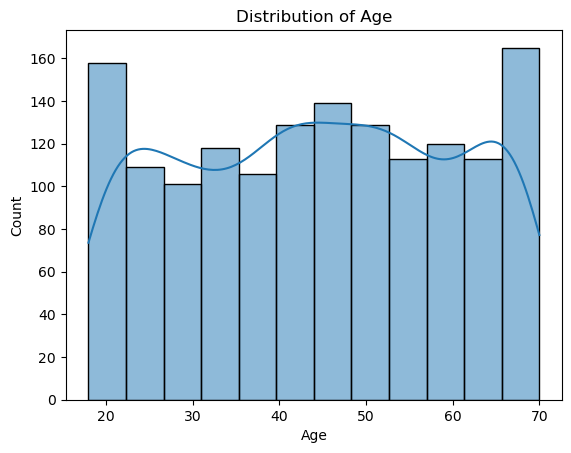

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


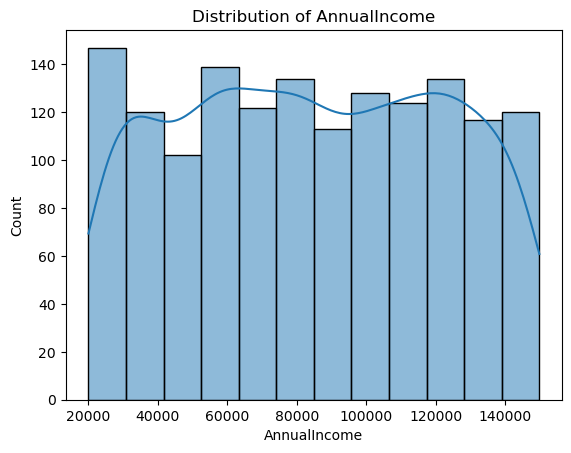

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


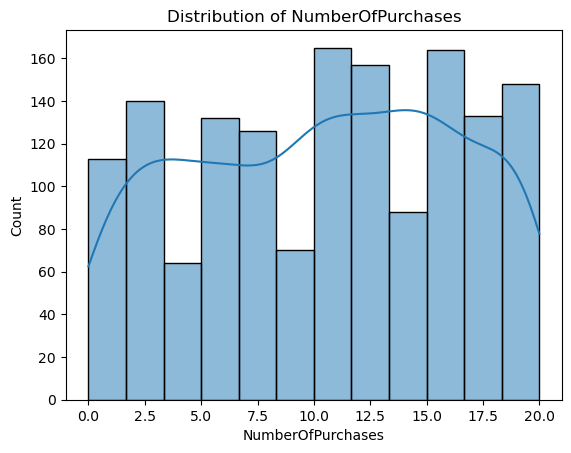

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


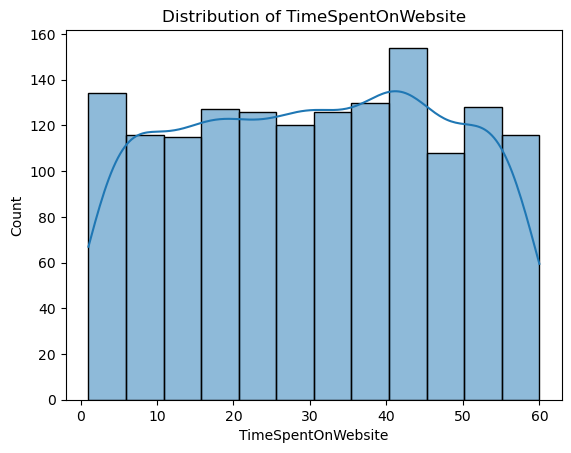

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


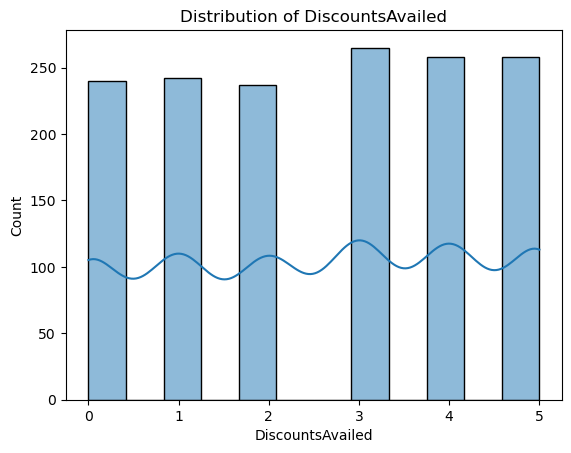

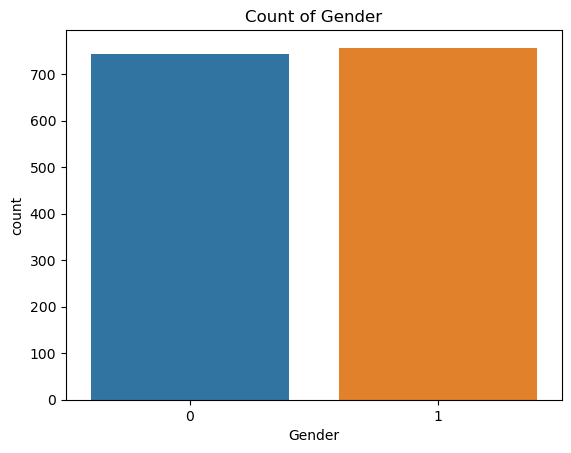

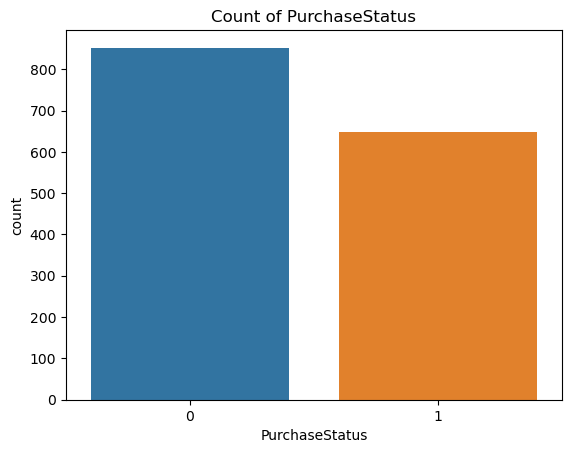

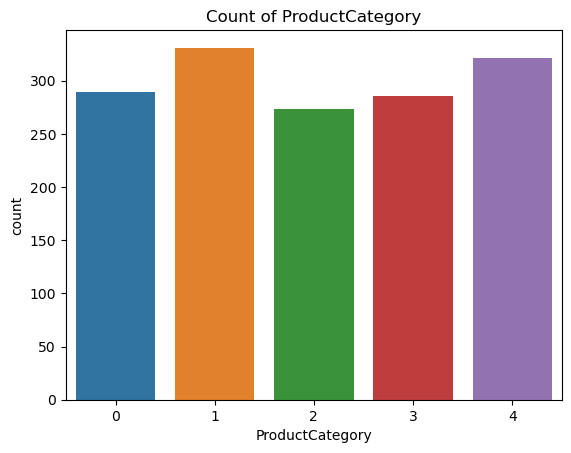

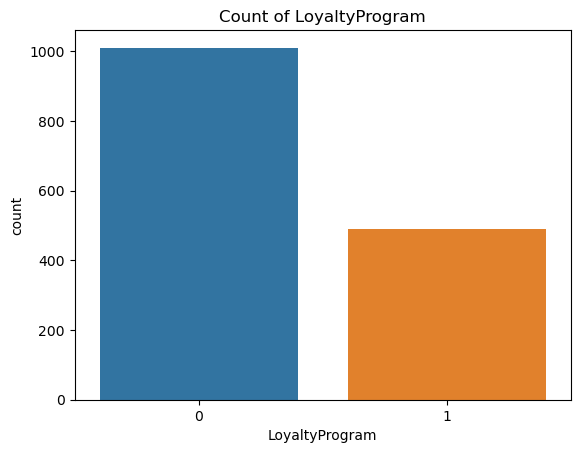

In [38]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
def univariate_analysis_numerical(df, column):
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

# Univariate Analysis for categorical variables
def univariate_analysis_categorical(df, column):
    sns.countplot(data=df, x=column)
    plt.title(f'Count of {column}')
    plt.show()

# Perform univariate analysis on numerical variables
numerical_columns = ['Age', 'AnnualIncome', 'NumberOfPurchases', 'TimeSpentOnWebsite', 'DiscountsAvailed']
for column in numerical_columns:
    univariate_analysis_numerical(df, column)

# Perform univariate analysis on categorical variables
categorical_columns = ['Gender', 'PurchaseStatus', 'ProductCategory', 'LoyaltyProgram']
for column in categorical_columns:
    univariate_analysis_categorical(df, column)

### Apply Logistic Regression

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 6)

In [43]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1125, 9), (375, 9), (1125,), (375,))

In [45]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [47]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [49]:
y_pred = logreg.predict(X_test)
y_pred

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,

In [51]:
y_test

24      1
1348    0
578     0
937     0
1163    1
       ..
488     0
1014    0
1114    0
672     0
1046    0
Name: PurchaseStatus, Length: 375, dtype: int64

In [53]:
from sklearn import metrics

In [55]:
metrics.accuracy_score(y_test, y_pred)

0.696

In [57]:
metrics.confusion_matrix(y_test, y_pred)

array([[154,  53],
       [ 61, 107]], dtype=int64)

In [59]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73       207
           1       0.67      0.64      0.65       168

    accuracy                           0.70       375
   macro avg       0.69      0.69      0.69       375
weighted avg       0.69      0.70      0.70       375



### Apply Decision Tree Algorithm

In [202]:
from sklearn.tree import DecisionTreeClassifier

In [204]:
def mymodel(model):
    model.fit(X_train,y_train)
    ypred=model.predict(X_test)
    print(metrics.classification_report(y_test,y_pred))
    return model

In [238]:
dt=DecisionTreeClassifier()

In [244]:
mymodel(dt)

              precision    recall  f1-score   support

           0       0.68      0.69      0.68       172
           1       0.57      0.55      0.56       128

    accuracy                           0.63       300
   macro avg       0.62      0.62      0.62       300
weighted avg       0.63      0.63      0.63       300



DecisionTreeClassifier()

In [240]:
metrics.confusion_matrix(y_test, y_pred)

array([[119,  53],
       [ 57,  71]], dtype=int64)

### Apply Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'criterion' : ['gini', 'entropy'],
          'max_depth' : [ 3, 4, 5, 7],
          'min_samples_leaf' : [10, 20, 50,100,150],
         }

grid_search = GridSearchCV(dt, param_grid= params)

In [211]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 7],
                         'min_samples_leaf': [10, 20, 50, 100, 150]})

In [212]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 10}

In [213]:
my_best_preds = grid_search.predict(X_test)

In [214]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, my_best_preds)

1.0

In [215]:
best_dt = grid_search.best_estimator_
y_pred_dt = best_dt.predict(X_test)

In [216]:
# Evaluate Decision Tree
cm_dt = metrics.confusion_matrix(y_test, y_pred_dt)
cr_dt = metrics.classification_report(y_test, y_pred_dt)

print("Best Decision Tree Model")
print("Confusion Matrix:\n", cm_dt)
print("Classification Report:\n", cr_dt)

Best Decision Tree Model
Confusion Matrix:
 [[172   0]
 [  0 128]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       172
           1       1.00      1.00      1.00       128

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



### Apply KNN

In [221]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn.predict(X_test)

# Evaluate the model
print("KNN Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", metrics.classification_report(y_test, y_pred))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))

KNN Performance:
Accuracy: 0.6333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.69      0.68       172
           1       0.57      0.55      0.56       128

    accuracy                           0.63       300
   macro avg       0.62      0.62      0.62       300
weighted avg       0.63      0.63      0.63       300

Confusion Matrix:
 [[119  53]
 [ 57  71]]


### Apply Hyperparameter Tuning

In [226]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [227]:
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='f1')
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='f1')

In [230]:
print("Best Parameters for KNN:", grid_knn.best_params_)
print("Best Score for KNN:", grid_knn.best_score_)

Best Parameters for KNN: {'n_neighbors': 3, 'weights': 'distance'}
Best Score for KNN: 0.615111111111111


In [231]:
best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)

In [232]:
cm_knn = metrics.confusion_matrix(y_test, y_pred_knn)
cr_knn = metrics.classification_report(y_test, y_pred_knn)

print("Best KNN Model")
print("Confusion Matrix:\n", cm_knn)
print("Classification Report:\n", cr_knn)

Best KNN Model
Confusion Matrix:
 [[123  49]
 [ 58  70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.72      0.70       172
           1       0.59      0.55      0.57       128

    accuracy                           0.64       300
   macro avg       0.63      0.63      0.63       300
weighted avg       0.64      0.64      0.64       300

